In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [8]:
%run Methods.ipynb

test_prepData (__main__.TestDataPrep) ... ok
test_withNA (__main__.TestDataPrep) ... ok
test_getItemsThatHaveElement (__main__.TestGetItemWithElements) ... ok

----------------------------------------------------------------------
Ran 3 tests in 2.652s

OK


In [3]:
pathToData = os.path.join(os.getcwd(), "Data", "Production_Crops_Livestock_E_All_Data.csv")
agData = pd.read_csv(pathToData, encoding="latin-1")

In [6]:


def prepDataYield(df, item, topX, y1, y2, keepCols=["Area Code", "Area", "Item", "Element", "Unit"]):
    """
        Prep data to plot for yield of an item. 
        Arguments:
            df: dataframe
            item: String, the item to plot for (has to be an available item)
            topX: int, the top X producers to have on the plot
            y1: int, the start year
            y2: int, the end year
        Returns: a dataframe ready for a line plot. 
    """
  
    checkArgs()
    
    df = dropRegionRows(df)
    df = df.drop(df[df["Area"] == "China"].index)
    df = yearsToRows(df, createYearList(y1, y2))
    topX()
    
    def topX():
        """
            Add a label to the dataframe. Countries with yield in 
            the top X keep their names as labels, everyone else 
            is labelled other. 
        """
        sumYield = df.groupby(["Area"])['Amount'].sum().reset_index()
        sumProduction = sumProduction.sort_values(by = ['Amount'], ascending = [False])
        topXcountries = sumProduction['Area'].to_numpy()[:topX]
        df['Label'] = [name if name in topXcountries else "Other" for name in df['Area']]
    
    def findOtherAverageYield():
        """
            Get the average yield of the other countries per year and add that
            data to the dataframe. 
        """
        dfOther = df[df['Label'] == "Other"]
        yearlyProd = findTotalPerYear(df[df['Element'] == "Production"])
        yearlyArea = findTotalPerYear(df[df['Element'] == "Area harvested"])
        
    
    def findTotalPerYear(df):
        """
            Find the total of the amount column per year for the df.
            Used as helper for finding other average yield to by summing
            a df of production and df of area. 
        """
        return df.groupby(["Year"])["Amount"].sum()
        
    
    def checkArgs():
        """
            Check the arguments are valid.
        """
        checkRange(y1, y2)
        itemsWithYield = getItemsThatHaveElement(df, "Yield")
        if (item not in itemsWithYield):
            raise ValueError("{item} does not have Yield data".format{item=item})
        
        
        



def plottingFuncLine(ax, year, plotDict):
    for country in plotDict.keys():
        ax.plot(year, plotDict[country], label = country)
    

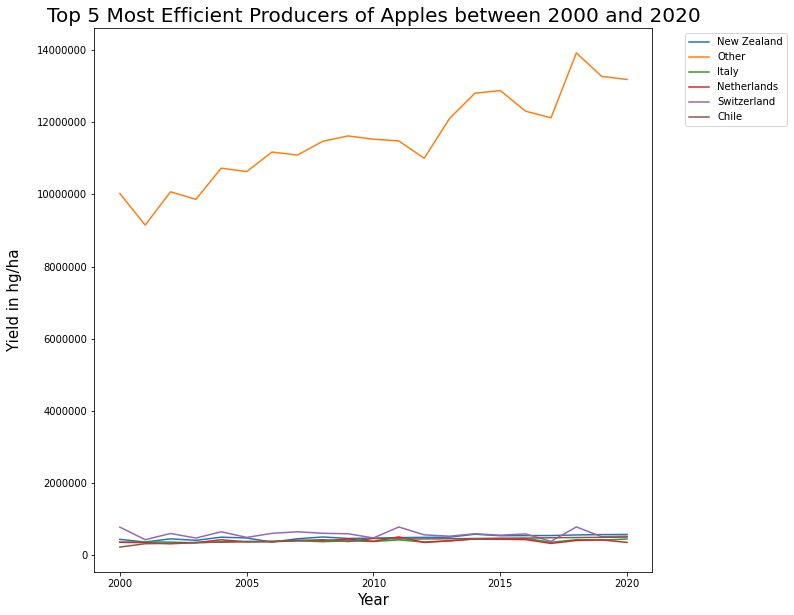

In [5]:
plotProductionCrop(agData, "Yield", "Apples", 2000, 2020, 5, plottingFuncLine)